# Project- Ensemble Technique

## Data Description:   
##### The data is related with direct marketing campaigns of a  Portuguese banking institution. The marketing campaigns  were based on phone calls. Often, more than one contact to  the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed.   

## Domain:   
##### Banking  

## Context:  
##### Leveraging customer information is paramount for most  businesses. In the case of a bank, attributes of customers like  the ones mentioned below can be crucial in strategizing a  marketing campaign when launching a new product.  

## Attribute Information: 

* age (numeric)  
* job : type of job (categorical:  'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown')  
* marital : marital status (categorical:  'divorced','married','single','unknown'; note: 'divorced'  means divorced or widowed)  
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes sional.course','university.degree','unknown') 
* default: has credit in default? (categorical:  'no','yes','unknown')  
* balance: average yearly balance, in euros (numeric)  
* housing: has housing loan? (categorical:  'no','yes','unknown')  
* loan: has personal loan? (categorical: 'no','yes','unknown')  
* contact: contact communication type (categorical:  'cellular','telephone')  
* day: last contact day of the month (numeric 1 -31)  
* month: last contact month of year (categorical: 'jan', 'feb',  'mar', ..., 'nov', 'dec')  
*  duration: last contact duration, in seconds (numeric).  Important note: this attribute highly affects the output  target (e.g., if duration=0 then y='no'). Yet, the duration is  not known before a call is performed. Also, after the end  of the call y is obviously known. Thus, this input should  only be included for benchmark purposes and should be  discarded if the intention is to have a realistic predictive  model.  
*  campaign: number of contacts performed during this  campaign and for this client (numeric, includes last  contact)  
*  pdays: number of days that passed by after the client  was last contacted from a previous campaign (numeric;  999 means client was not previously contacted)  
* previous: number of contacts performed before this  campaign and for this client (numeric)  
*  poutcome: outcome of the previous marketing  campaign (categorical: 'failure','nonexistent','success')  
* target: has the client subscribed a term deposit? (binary:  "yes","no") 

## Learning Outcomes:  
* Exploratory Data Analysis  
* Preparing the data to train a model  
* Training and making predictions using an Ensemble  Model  
* Tuning an Ensemble model    

## Objective  
##### The classification goal is to predict if the client will subscribe  (yes/no) a term deposit (variable y).  

# Importing Packages and Reading file as DataFrame

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr #for pearson's correlation

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  #for image
from os import system #using user environment

from sklearn.ensemble import BaggingClassifier #for bagging classifier
from sklearn.ensemble import AdaBoostClassifier #for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier #for gradient boosting
from sklearn.ensemble import RandomForestClassifier #for random forest
from sklearn.preprocessing import LabelEncoder #for lebel encoder


from sklearn.tree import export_graphviz #for exporting dot data
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices


In [3]:
DataFrame = pd.read_csv('bank-full.csv') 
DataFrame.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
DataFrame.tail() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Exploratory Data Analysis

## Shape of the data

In [5]:
print('\033[1m''Number of rows in dataframe',DataFrame.shape[0])
print('\033[1m''Number of features in dataframe',DataFrame.shape[1]) 

Number of rows in dataframe 45211
Number of features in dataframe 17


* The dataset has 45211 rows and 17 columns(features)

## Data type of each attribute

In [6]:
DataFrame.dtypes.to_frame('Datatypes of attributes').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


* 10 features have object datatype and 7 have int datatype
* As per given data we know that 10 features are of category type,so lets convert the datatype of those features

In [7]:
DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
DataFrame.dtypes.to_frame('Datatypes of attributes').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


* After conversion of datatypes in above step
* 10 features have category datatype and 7 have int datatype

## Checking the presence of missing values

In [8]:
DataFrame.isnull().sum().to_frame('Presence of missing values').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* In above cell, missing values are not found, so checking columns where unknown is mentioned
* Checking columns which contain string data


In [9]:
DataFrame['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
DataFrame['contact'].value_counts() 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [11]:
DataFrame['education'].value_counts() 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
DataFrame['job'].value_counts() 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

* The dataset has unknown values in 'job','education','contact' and 'poutcome' columns

##  5 point summary of numerical attribute

In [13]:
DataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### 5 point summary understanding:
* Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
* Minimum balance is -8019 and maximum balance is 102127
* Minimum age is 18 years and maximum is 95 years




* All customers have been contacted previously

## Distribution of numerical columns.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

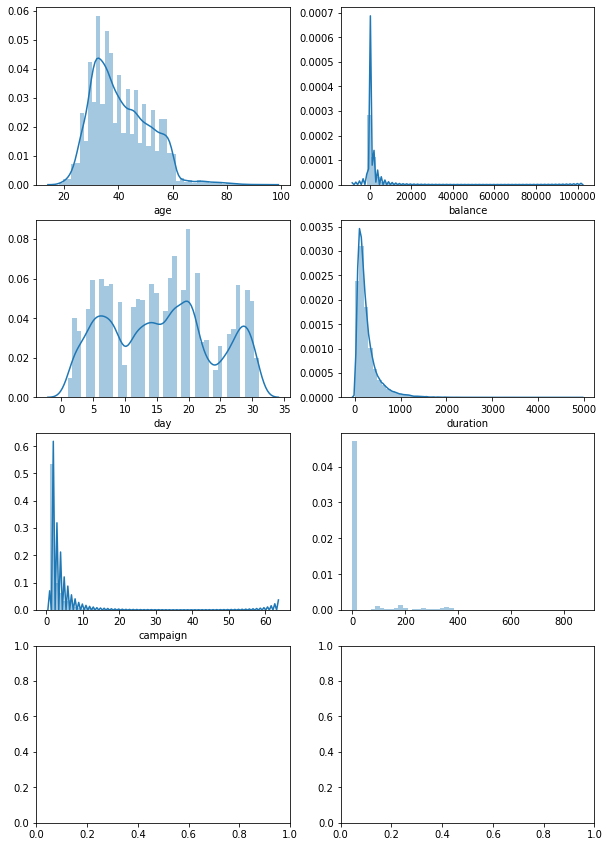

In [14]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 

sns.distplot(DataFrame['age'],ax=axe[0]) 
sns.distplot(DataFrame['balance'],ax=axe[1]) 
sns.distplot(DataFrame['day'],ax=axe[2])
sns.distplot(DataFrame['duration'],ax=axe[3])
sns.distplot(DataFrame['campaign'],ax=axe[4]) 
sns.distplot(DataFrame['pdays'],ax=axe[5])
sns.distplot(DataFrame['previous'],ax=axe[6]) 


fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)

### Understanding from distributions
* 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
* 'age' is somewhat normally distributed



## Distribution of Categorical columns.

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


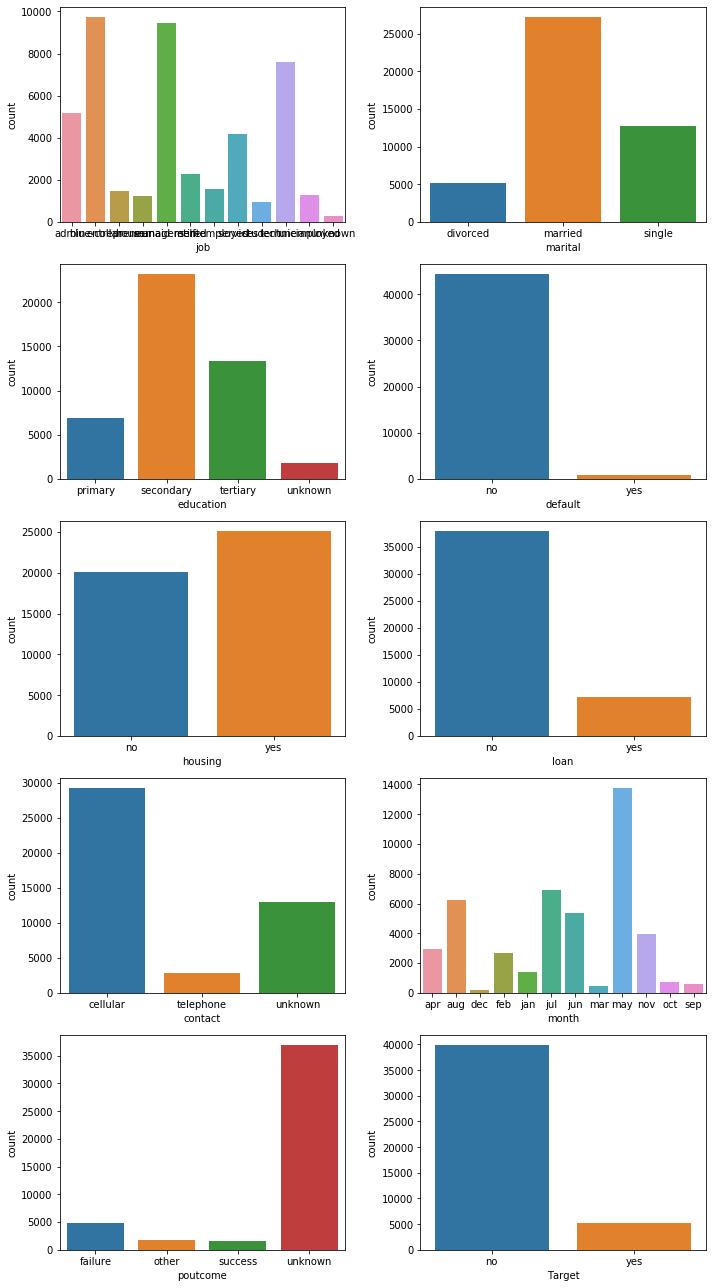

In [15]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() 

plot=sns.countplot(x=DataFrame['job'],data=DataFrame,ax=axe[0])  


sns.countplot(x=DataFrame['marital'],data=DataFrame,ax=axe[1])  
sns.countplot(x=DataFrame['education'],data=DataFrame,ax=axe[2]) 
sns.countplot(x=DataFrame['default'],data=DataFrame,ax=axe[3]) 
sns.countplot(x=DataFrame['housing'],data=DataFrame,ax=axe[4])  
sns.countplot(x=DataFrame['loan'],data=DataFrame,ax=axe[5]) 
sns.countplot(x=DataFrame['contact'],data=DataFrame,ax=axe[6]) 
sns.countplot(x=DataFrame['month'],data=DataFrame,ax=axe[7]) 
sns.countplot(x=DataFrame['poutcome'],data=DataFrame,ax=axe[8])  
sns.countplot(x=DataFrame['Target'],data=DataFrame,ax=axe[9])


fig.tight_layout() 
fig.show() 


 ### Understanding from distributions
* More than 90% customers have no default credit
* Around 88% customers have not subscribed for term deposit
* Most customers have been contacted in may
* Most customers have been contacted by cellular network(mobile phone)
* Number of customers who have housing loan is more than the number of customers who don't have housing loan
* Around 6% customers have credit in default



## Measure of skewness of numerical columns

In [16]:
DataFrame.skew().to_frame('Skewness measure').T 

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


## Checking the presence of outliers 

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


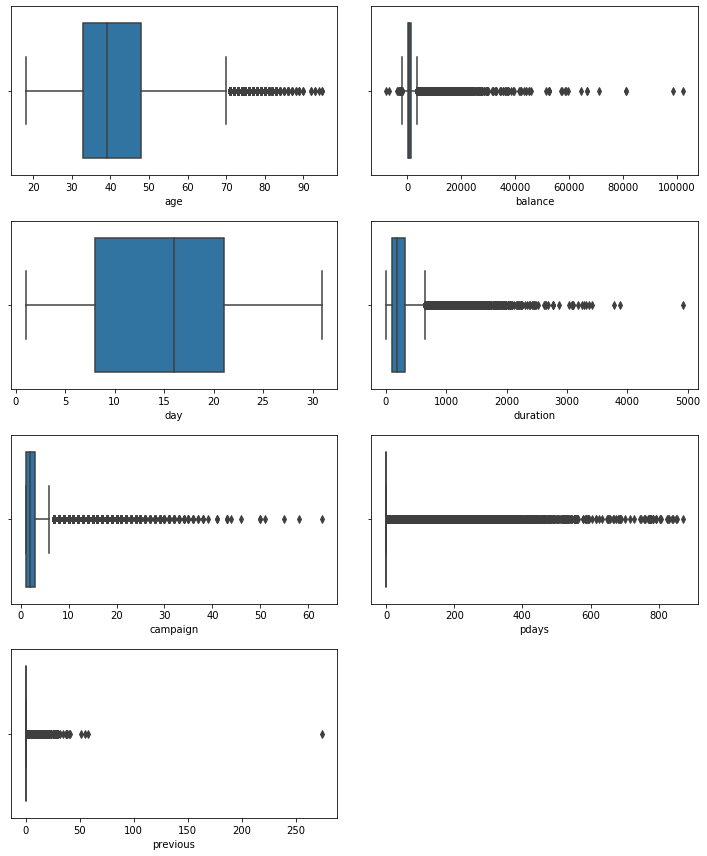

In [18]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()

sns.boxplot(x='age',data=DataFrame,ax=axe[0]) 
sns.boxplot(x='balance',data=DataFrame,ax=axe[1]) 
sns.boxplot(x='day',data=DataFrame,ax=axe[2])  
sns.boxplot(x='duration',data=DataFrame,ax=axe[3])  
sns.boxplot(x='campaign',data=DataFrame,ax=axe[4]) 
sns.boxplot(x='pdays',data=DataFrame,ax=axe[5])
sns.boxplot(x='previous',data=DataFrame,ax=axe[6]) 


fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)


### Understanding from boxplots
* Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
* Values less than 0 are present in 'Balance' column

## Distribution of Target column

In [19]:
DataFrame['Target'].value_counts().to_frame('Target column distriution') 

,Target column distriution
no,39922
yes,5289


* From above values it can be stated that the dataset is imbalanced.

# Data Preprocessing:

## Label Encoding of variables

In [20]:
df_2 = DataFrame.copy() 
encoder = LabelEncoder() 

df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) 
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) 
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int) 
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)


df_2.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


## Checking & modifying datatypes after Label Encoding

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [21]:
df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
#changing datatypes of attributes

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handeling Outliers with mean replacement

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Boxplots after handeling outliers


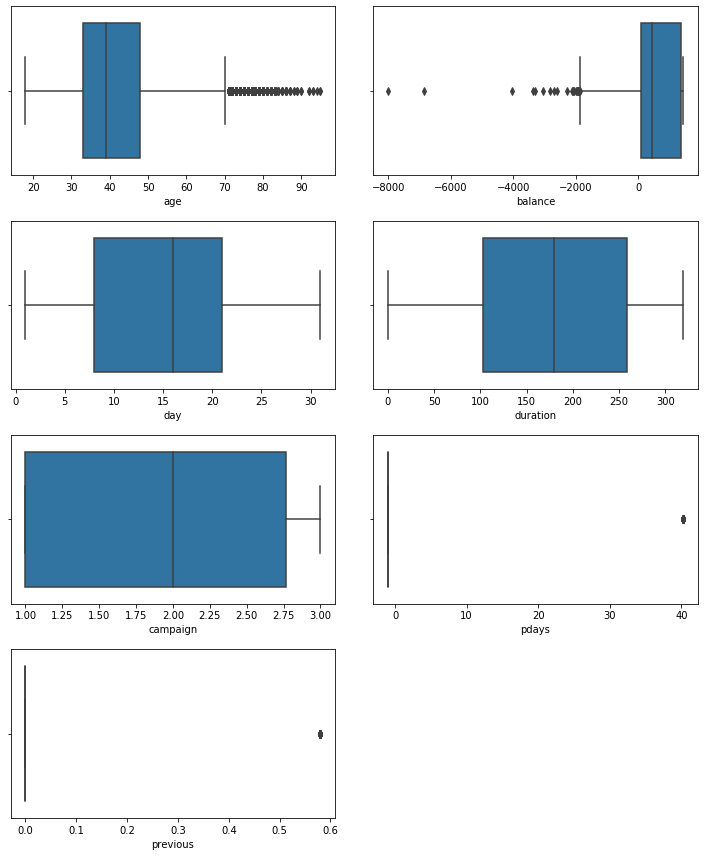

In [22]:
meanbal = float(df_2['balance'].mean())
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) 

meandur = float(df_2['duration'].mean())
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])

meancam = float(df_2['campaign'].mean()) 
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])
meanpd = float(df_2['pdays'].mean()) 
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])

meanpr = float(df_2['previous'].mean()) 
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])


# AFTER Removing Outliers

fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()

sns.boxplot(x='age',data=df_2,ax=axe[0]) 
sns.boxplot(x='balance',data=df_2,ax=axe[1]) 
sns.boxplot(x='day',data=df_2,ax=axe[2]) 
sns.boxplot(x='duration',data=df_2,ax=axe[3]) 
sns.boxplot(x='campaign',data=df_2,ax=axe[4])  
sns.boxplot(x='pdays',data=df_2,ax=axe[5]) 
sns.boxplot(x='previous',data=df_2,ax=axe[6])


fig.tight_layout()
fig.show() 
axe.flat[-1].set_visible(False)

print('\033[1m''Boxplots after handeling outliers')


### Understanding from boxplots after handeling outliers
* Outliers in 'age' column are not handled because it is a specific value for each record.
* After handeling Outliers in 'balance', the number of outliers on the lower side is increased.


## Corr plot of all features

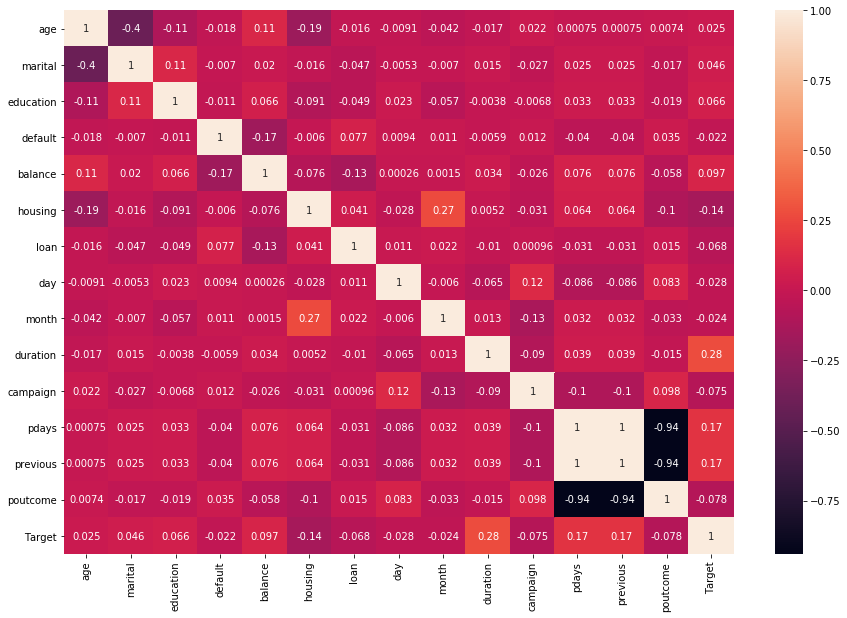

In [23]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df_2.corr(),annot=True)

### Understanding from above corrp plot:

* 'pdays' and 'previous' are highly correlated

## Removing columns:

* 'job','education' and 'contact' attributes contain multiple unknown values.
* As they are specific string values and not numerical so cannot be treated with median, mean replacement
* As per data description, duration attribute is removed to have a realistic prediction.
* 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
* 'pdays' and 'previous' are highly correlated so removing any one from both of them.
*  Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [24]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

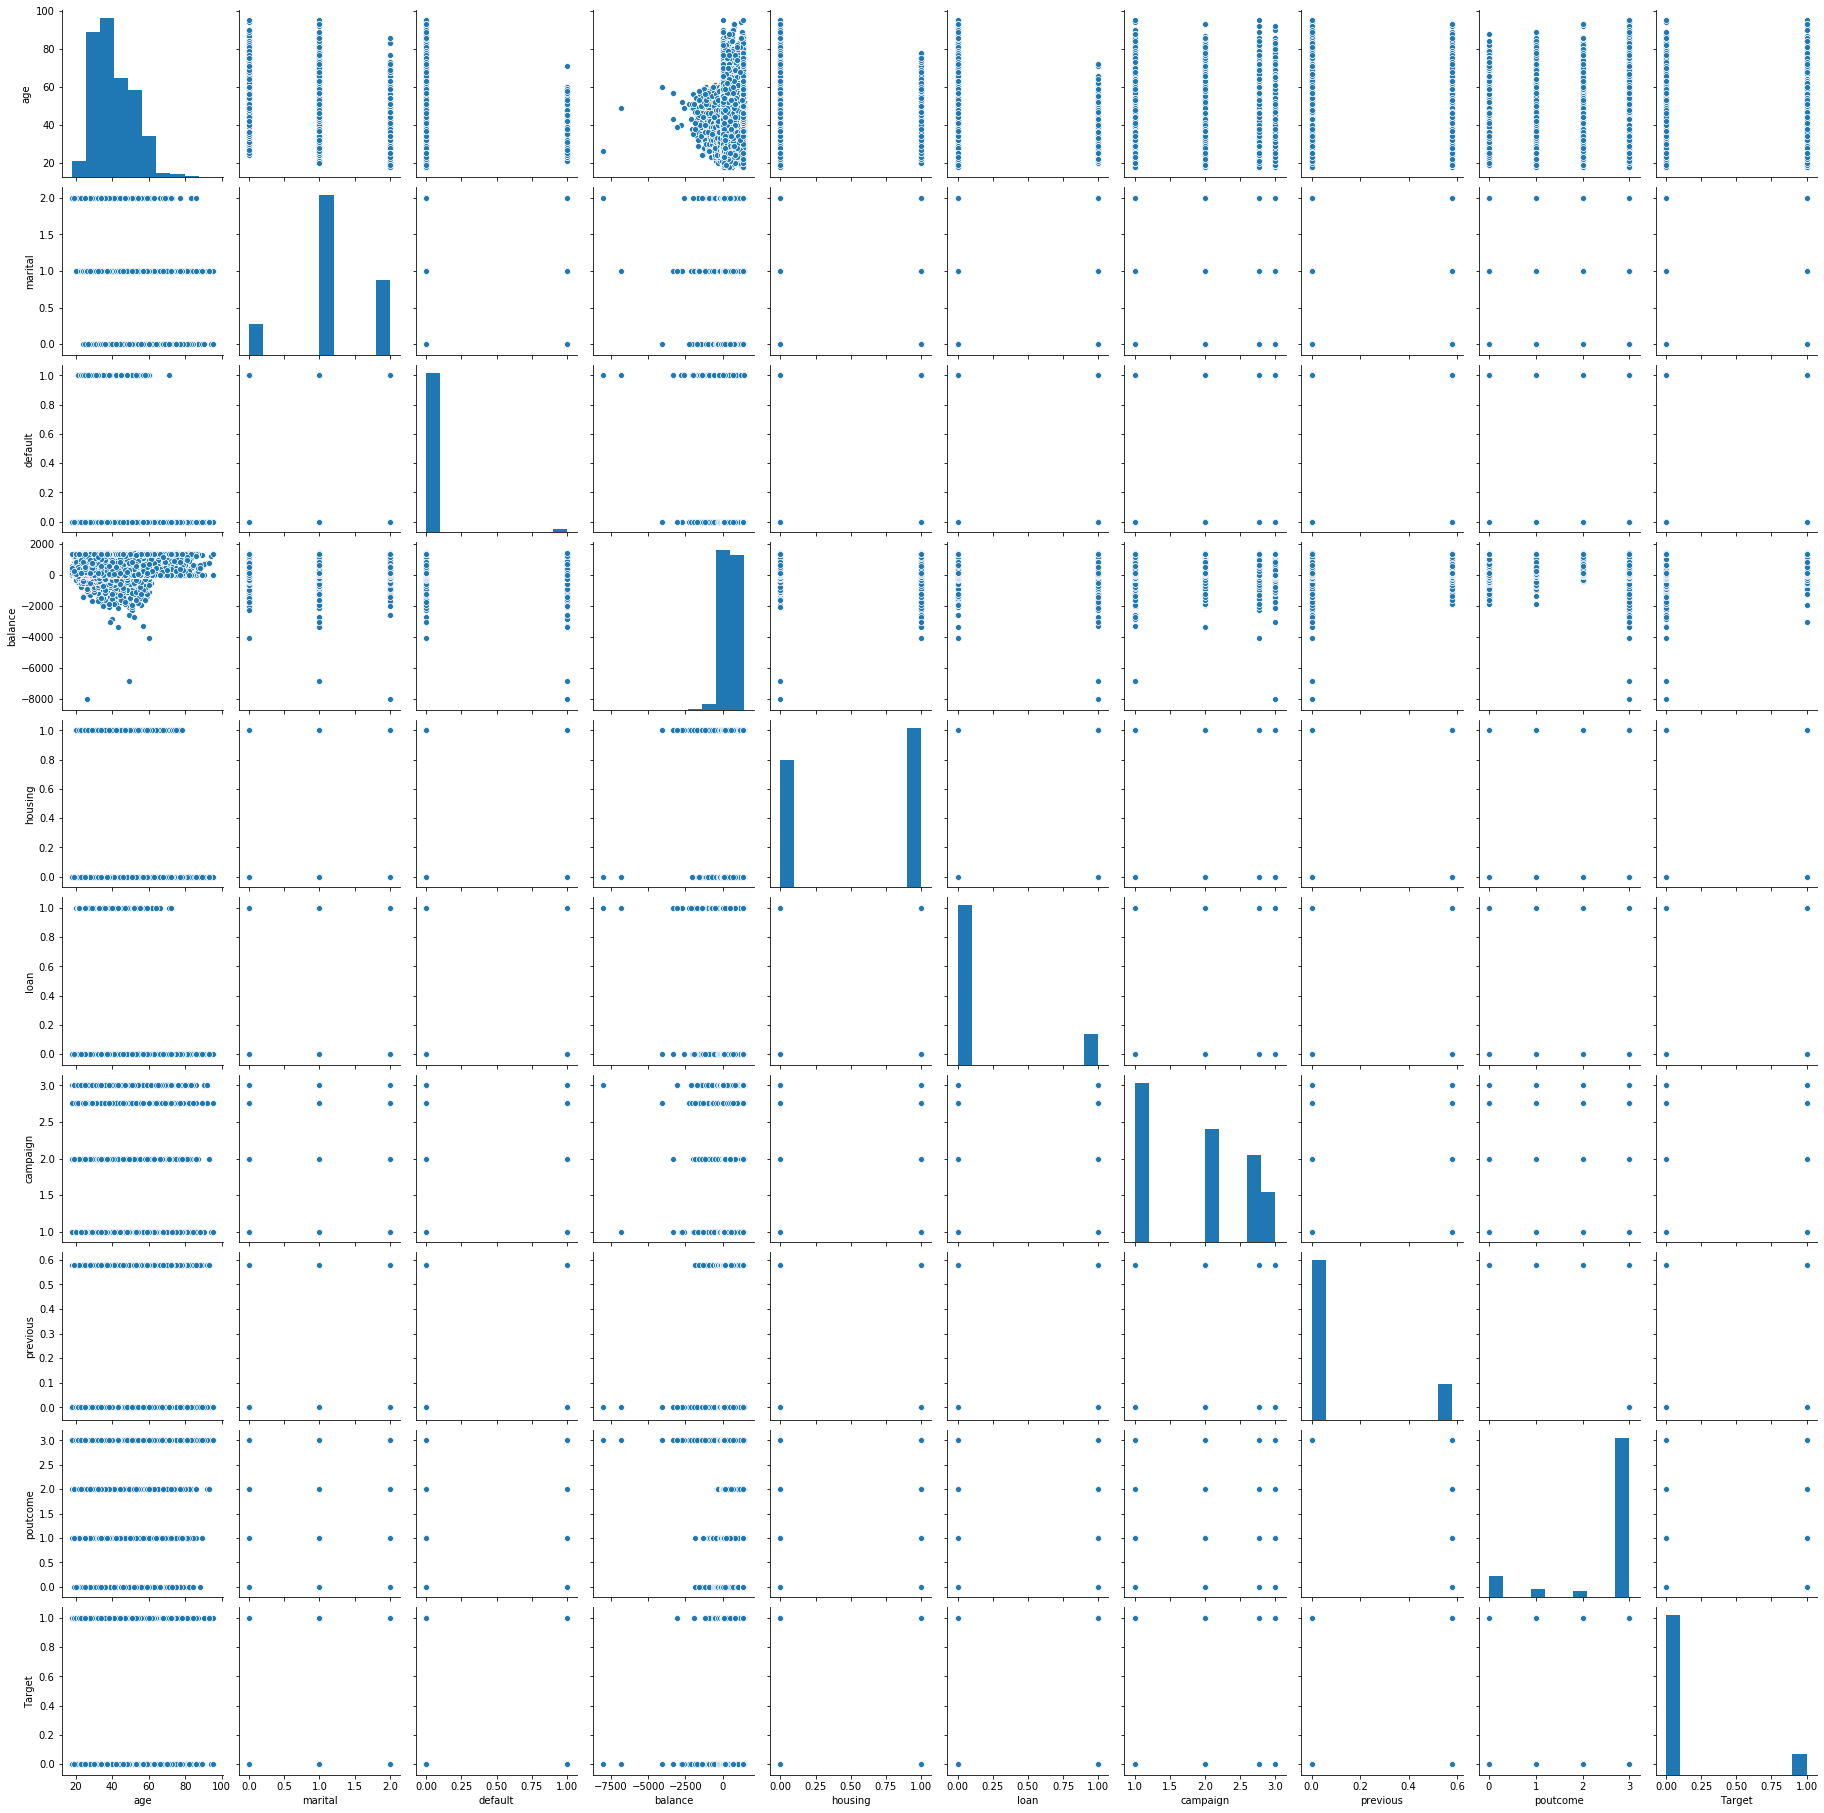

In [25]:
sns.pairplot(df_2) 

# Train Test Split (70:30)

In [26]:
X = df_2.drop('Target',axis=1)   
y = df_2['Target'] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

# Scaling of columns

In [27]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

# Models:
## Logistic Regression:

In [28]:
logic_r = LogisticRegression(solver='liblinear') 
logic_r.fit(X_train_scaled,y_train)
y_pred = logic_r.predict(X_test_scaled) 

In [29]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) 
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) 
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11897   116]
 [ 1310   241]]
----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Naive Bayes

In [30]:
NB = GaussianNB()   
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled)

In [31]:
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) 
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) 
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) 
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## K-Nearest Neighbor

In [32]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  
knn.fit(X_train_scaled,y_train) 
y_predict = knn.predict(X_test_scaled)  

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi))
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) 
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) 
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## SVC

In [33]:
svc = SVC()  
svc.fit(X_train_scaled,y_train) 
predicted_svc = svc.predict(X_test_scaled) 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) 
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) 
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) 
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11867   146]
 [ 1273   278]]
------------------------------
Accuracy of SVC : 0.8953848422294308
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Ensemble Models

## Decision Tree

In [34]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train) 
predicted_DT = dTree.predict(X_test) 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) 
print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) 
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) 
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11020   993]
 [ 1190   361]]
------------------------------
Accuracy of Decision Tree :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Feature importance test for decision tree

In [37]:
xvar = df_2.drop('Target', axis=1) 

feature_cols = xvar.columns 
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) 


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) 

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 

feat_imp.sort_values(by=0, ascending=False) 


,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


## Bagging

In [38]:

bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) 
bagc = bagc.fit(X_train, y_train) 
predicted_BAG = bagc.predict(X_test) 


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)

BAG_accuracy = accuracy_score(y_test,predicted_BAG)

print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) #for accuracy score
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11617   396]
 [ 1220   331]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.46      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Adaptive Boosting

In [39]:

adab = AdaBoostClassifier(n_estimators=50, random_state=1) 
adab = adab.fit(X_train, y_train) 
predicted_ADA = adab.predict(X_test) 


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) 
print('-'*30)

ADA_accuracy = accuracy_score(y_test,predicted_ADA)

print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy)) 
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) 
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11884   129]
 [ 1309   242]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Gradient boosting

In [41]:

gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) 
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test) 


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) 
print('-'*30)

GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)

print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy)) 
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) 
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11889   124]
 [ 1305   246]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


## Random Forest

In [42]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train) 
predicted_RAN = randf.predict(X_test) 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) 
print('-'*30)

RAN_accuracy = accuracy_score(y_test,predicted_RAN )

print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy)) 
print('-'*30)

print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) #for classification report
print('->'*63)


->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11588   425]
 [ 1211   340]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Models with accuracy scores

In [45]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy)] 

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) 

print('\033[1m''Current Scores with Outliers replaced with mean:')

Scores.sort_values(by='Accuracy score',ascending=False) 


Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
6,Bagging,0.880861
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059
0,Naive bayes,0.829475
